<a href="https://colab.research.google.com/github/Raahulsi/Play-Store-App-Review-Analysis-Capstone-Project/blob/main/Rahul_Singh_Capstone_Project_Notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Project**


In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set_style('darkgrid')

In [5]:
from google.colab import drive
drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [6]:
#Loading csv file
file_path = '/content/drive/MyDrive/Alma Better_Capstone_Project_1_Rahul_Singh/Play Store Data.csv'
googlestore_df=pd.read_csv(file_path)

In [ ]:
#Lets do some basic operation to get the information about the data given in the data set

#**Data Preparation and Cleaning**

Data preparation is the process of cleaning and transforming raw data prior to processing and analysis. It is an important step prior to processing and often involves reformatting data, making corrections to data and the combining of data sets to enrich data. Data cleansing or data cleaning is the process of detecting and correcting (or removing) corrupt or inaccurate records from a record set, table, or database and refers to identifying incomplete, incorrect, inaccurate or irrelevant parts of the data and then replacing, modifying, or deleting the dirty or coarse data.

In [7]:
googlestore_df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [8]:
googlestore_df.tail()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10836,Sya9a Maroc - FR,FAMILY,4.5,38,53M,"5,000+",Free,0,Everyone,Education,"July 25, 2017",1.48,4.1 and up
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3.6M,100+,Free,0,Everyone,Education,"July 6, 2018",1.0,4.1 and up
10838,Parkinson Exercices FR,MEDICAL,NaN,3,9.5M,"1,000+",Free,0,Everyone,Medical,"January 20, 2017",1.0,2.2 and up
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,Varies with device,"1,000+",Free,0,Mature 17+,Books & Reference,"January 19, 2015",Varies with device,Varies with device
10840,iHoroscope - 2018 Daily Horoscope & Astrology,LIFESTYLE,4.5,398307,19M,"10,000,000+",Free,0,Everyone,Lifestyle,"July 25, 2018",Varies with device,Varies with device


In [9]:
googlestore_df.shape
#The data set contain 10841 rows and 13 columns

(10841, 13)

In [10]:
googlestore_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


In [11]:
googlestore_df.columns

Index(['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type',
       'Price', 'Content Rating', 'Genres', 'Last Updated', 'Current Ver',
       'Android Ver'],
      dtype='object')

In [12]:
googlestore_df.describe()

,Rating
count,9367.000000
mean,4.193338
std,0.537431
min,1.000000
25%,4.000000
50%,4.300000
75%,4.500000
max,19.000000


In [13]:
#Lets check the null value if any present in the dataset or not
googlestore_df.isnull().sum()

App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64

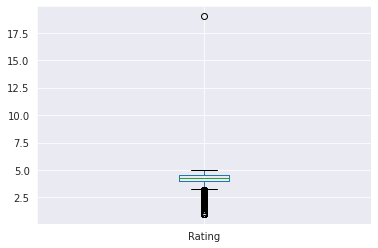

In [14]:
googlestore_df.boxplot()

# AS it is clearly visible there are some outlier present in the column rating so we need to remove those in order to get the clear reports

In [15]:
googlestore_df[googlestore_df.Rating>5]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10472,Life Made WI-Fi Touchscreen Photo Frame,1.9,19.0,3.0M,"1,000+",Free,0,Everyone,NaN,"February 11, 2018",1.0.19,4.0 and up,NaN


# We need to drop this row 10472 because here rating is given as 19 which is not possible and this act as a outlier as in our data

In [16]:
googlestore_df.drop([10472],inplace = True)

In [17]:
googlestore_df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


# Lets just check wheather 10472 is preset in our data set or not.

In [18]:
googlestore_df[10470:10476]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10470,Jazz Wi-Fi,COMMUNICATION,3.4,49,4.0M,"10,000+",Free,0,Everyone,Communication,"February 10, 2017",0.1,2.3 and up
10471,Xposed Wi-Fi-Pwd,PERSONALIZATION,3.5,1042,404k,"100,000+",Free,0,Everyone,Personalization,"August 5, 2014",3.0.0,4.0.3 and up
10473,osmino Wi-Fi: free WiFi,TOOLS,4.2,134203,4.1M,"10,000,000+",Free,0,Everyone,Tools,"August 7, 2018",6.06.14,4.4 and up
10474,Sat-Fi Voice,COMMUNICATION,3.4,37,14M,"1,000+",Free,0,Everyone,Communication,"November 21, 2014",2.2.1.5,2.2 and up
10475,Wi-Fi Visualizer,TOOLS,3.9,132,2.6M,"50,000+",Free,0,Everyone,Tools,"May 17, 2017",0.0.9,2.3 and up
10476,Lennox iComfort Wi-Fi,LIFESTYLE,3.0,552,7.6M,"50,000+",Free,0,Everyone,Lifestyle,"March 22, 2017",2.0.15,2.3.3 and up


# Let's have a look at the rows of the column Type having NULL values

In [19]:
googlestore_df[googlestore_df.Type.isnull()]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
9148,Command & Conquer: Rivals,FAMILY,NaN,0,Varies with device,0,NaN,0,Everyone 10+,Strategy,"June 28, 2018",Varies with device,Varies with device


# Since there is only one value missing in the Type column
So, Lets fill the missing value, After cross-checking in the playstore the missing value is found to be Free, So Now we can fill the missing value with Free

In [20]:
googlestore_df['Type'].fillna("Free", inplace = True)

# We can drop the unwanted columns

In [21]:
googlestore_df.drop(['Current Ver','Last Updated', 'Android Ver'], axis=1, inplace=True)

In [22]:
googlestore_df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity


#There are missing values are present in the rating column so let us replace the missing values of the Rating Column with the Mode value of that entire column

In [23]:
ModeValueRating = googlestore_df['Rating'].mode()

In [24]:
ModeValueRating

0    4.4
dtype: float64

In [25]:
googlestore_df['Rating'].fillna(value=ModeValueRating[0],inplace = True)

In [26]:
googlestore_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10840 entries, 0 to 10840
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10840 non-null  object 
 1   Category        10840 non-null  object 
 2   Rating          10840 non-null  float64
 3   Reviews         10840 non-null  object 
 4   Size            10840 non-null  object 
 5   Installs        10840 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10840 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10840 non-null  object 
dtypes: float64(1), object(9)
memory usage: 931.6+ KB


In [27]:
googlestore_df.isnull().sum()

App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              0
Price             0
Content Rating    0
Genres            0
dtype: int64

# We are done with the data cleaning now.

In [28]:
googlestore_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10840 entries, 0 to 10840
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10840 non-null  object 
 1   Category        10840 non-null  object 
 2   Rating          10840 non-null  float64
 3   Reviews         10840 non-null  object 
 4   Size            10840 non-null  object 
 5   Installs        10840 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10840 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10840 non-null  object 
dtypes: float64(1), object(9)
memory usage: 931.6+ KB


# Now we can start working on the data preparation

In [29]:
googlestore_df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity


# Firstly, we need to convert the data types with their respective actual type
Reviews, Size, Installs, & Price should have an integer or float datatype, But here we can see of object type, So we need to convert them to their respective type.

In [30]:
googlestore_df['Reviews'] = googlestore_df.Reviews.astype(int)

In [31]:
googlestore_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10840 entries, 0 to 10840
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10840 non-null  object 
 1   Category        10840 non-null  object 
 2   Rating          10840 non-null  float64
 3   Reviews         10840 non-null  int64  
 4   Size            10840 non-null  object 
 5   Installs        10840 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10840 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10840 non-null  object 
dtypes: float64(1), int64(1), object(8)
memory usage: 931.6+ KB


# Column: Size
Converting the Size Column from object to integer.

There is a + symbol present in the size column so we need to remove this in order to convert the object into integer

In [32]:
googlestore_df['Size'] = googlestore_df.Size.apply(lambda x: x.strip('+'))

# We also need to remove the comma sign (,) from the size column

In [33]:
googlestore_df['Size'] = googlestore_df.Size.apply(lambda x: x.replace(',', ''))


In [34]:
googlestore_df.tail(50)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres
10791,Winter Wonderland,GAME,4.0,1287,38M,"50,000+",Free,0,Everyone,Word
10792,Soccer Clubs Logo Quiz,GAME,4.2,21661,16M,"1,000,000+",Free,0,Everyone,Trivia
10793,Sid Story,GAME,4.4,28510,78M,"500,000+",Free,0,Teen,Card
10794,PopStar,FAMILY,4.4,13,5.7M,"1,000+",Free,0,Everyone,Casual
10795,Reindeer VPN - Proxy VPN,TOOLS,4.2,7339,4.0M,"100,000+",Free,0,Everyone,Tools
10796,Inf VPN - Global Proxy & Unlimited Free WIFI VPN,TOOLS,4.7,61445,7.8M,"1,000,000+",Free,0,Everyone,Tools
10797,Fuel Rewards® program,LIFESTYLE,4.6,32433,46M,"1,000,000+",Free,0,Everyone,Lifestyle
10798,Word Search Tab 1 FR,FAMILY,4.4,0,1020k,50+,Paid,$1.04,Everyone,Puzzle
10799,Fr Daoud Lamei,SOCIAL,4.7,2036,6.8M,"100,000+",Free,0,Everyone,Social
10800,FR Roster,TOOLS,4.1,174,12M,"5,000+",Free,0,Everyone,Tools


# Replacing the M by multiplying the value with 1000000

In [35]:
# For converting the M to Mega
googlestore_df['Size'] = googlestore_df.Size.apply(lambda x: x.replace('M', 'e+6'))


In [36]:
# For convertinf the K to Kilo
googlestore_df['Size'] = googlestore_df.Size.apply(lambda x: x.replace('k', 'e+3'))


In [37]:
# Replacing the Varies with device value with Nan
googlestore_df['Size'] = googlestore_df.Size.replace('Varies with device', np.NaN)


# Now we have replace all the required parameters and now we can convert the column size into integer

In [38]:
#Converting the string to Numeric type
googlestore_df['Size'] = pd.to_numeric(googlestore_df['Size'])


In [39]:
googlestore_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10840 entries, 0 to 10840
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10840 non-null  object 
 1   Category        10840 non-null  object 
 2   Rating          10840 non-null  float64
 3   Reviews         10840 non-null  int64  
 4   Size            9145 non-null   float64
 5   Installs        10840 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10840 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10840 non-null  object 
dtypes: float64(2), int64(1), object(7)
memory usage: 931.6+ KB


In [40]:
googlestore_df.isnull().sum()

App                  0
Category             0
Rating               0
Reviews              0
Size              1695
Installs             0
Type                 0
Price                0
Content Rating       0
Genres               0
dtype: int64

# We can drop the rows under the column size those have null vaues, because the size of the apps can vary from very low to very high so its not a good idea to replace those nan values with mode or median.

In [41]:
googlestore_df.dropna(subset = ['Size'],inplace = True)

In [42]:
googlestore_df.isnull().sum()

App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              0
Price             0
Content Rating    0
Genres            0
dtype: int64

# Column: Installs
Converting the Installs column from object to integer

First of all we will need to remove the + symbol from the values

In [43]:
googlestore_df['Installs']= googlestore_df.Installs.apply(lambda x: x.strip('+'))

# Now we need to remove the , from the numbers also

In [44]:
# Remove the , from the numbers
googlestore_df['Installs']= googlestore_df.Installs.apply(lambda x:x.replace(',',''))

# Now we need to convert the string type to numeric type

In [45]:
googlestore_df['Installs']= pd.to_numeric(googlestore_df['Installs'])

In [46]:
googlestore_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9145 entries, 0 to 10840
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             9145 non-null   object 
 1   Category        9145 non-null   object 
 2   Rating          9145 non-null   float64
 3   Reviews         9145 non-null   int64  
 4   Size            9145 non-null   float64
 5   Installs        9145 non-null   int64  
 6   Type            9145 non-null   object 
 7   Price           9145 non-null   object 
 8   Content Rating  9145 non-null   object 
 9   Genres          9145 non-null   object 
dtypes: float64(2), int64(2), object(6)
memory usage: 785.9+ KB


# Price column Dtype is object so we need to convert this into numeric

In [47]:
#
googlestore_df['Price'].value_counts()

0          8421
$0.99       145
$2.99       114
$1.99        66
$4.99        65
           ... 
$389.99       1
$19.90        1
$1.75         1
$14.00        1
$1.04         1
Name: Price, Length: 87, dtype: int64

# First we need to remove the $ sign from price

In [48]:
googlestore_df['Price'] = googlestore_df.Price.apply(lambda x: x.strip('$'))

In [49]:
# Now we can covert this price into numeric Dtype
googlestore_df['Price']=pd.to_numeric(googlestore_df['Price'])

In [50]:
googlestore_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9145 entries, 0 to 10840
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             9145 non-null   object 
 1   Category        9145 non-null   object 
 2   Rating          9145 non-null   float64
 3   Reviews         9145 non-null   int64  
 4   Size            9145 non-null   float64
 5   Installs        9145 non-null   int64  
 6   Type            9145 non-null   object 
 7   Price           9145 non-null   float64
 8   Content Rating  9145 non-null   object 
 9   Genres          9145 non-null   object 
dtypes: float64(3), int64(2), object(5)
memory usage: 785.9+ KB


# Now we are done with the Data Preparation and Cleaning and we can start the Exploratory Analysis and Visualization

In [51]:
googlestore_df.shape

(9145, 10)

# Exploratory Analysis and Visualization
In statistics, exploratory data analysis is an approach to analyzing data sets to summarize their main characteristics, often with visual methods. A statistical model can be used or not, but primarily EDA is for seeing what the data can tell us beyond the formal modeling or hypothesis testing task. Data visualization is the graphic representation of data. It involves producing images that communicate relationships among the represented data to viewers of the images. This communication is achieved through the use of a systematic mapping between graphic marks and data values in the creation of the visualization. This mapping establishes how data values will be represented visually, determining how and to what extent a property of a graphic mark, such as size or color, will change to reflect changes in the value of a datum.

In [52]:
googlestore_df['Category'].value_counts()

FAMILY                 1832
GAME                   1015
TOOLS                   739
MEDICAL                 434
BUSINESS                400
PERSONALIZATION         355
LIFESTYLE               345
SPORTS                  311
FINANCE                 307
PRODUCTIVITY            303
COMMUNICATION           265
HEALTH_AND_FITNESS      264
PHOTOGRAPHY             254
NEWS_AND_MAGAZINES      216
DATING                  212
SOCIAL                  210
SHOPPING                201
BOOKS_AND_REFERENCE     197
TRAVEL_AND_LOCAL        192
VIDEO_PLAYERS           131
EDUCATION               111
MAPS_AND_NAVIGATION     108
FOOD_AND_DRINK          100
ENTERTAINMENT            90
LIBRARIES_AND_DEMO       82
AUTO_AND_VEHICLES        75
HOUSE_AND_HOME           68
ART_AND_DESIGN           62
EVENTS                   57
WEATHER                  57
PARENTING                54
COMICS                   51
BEAUTY                   47
Name: Category, dtype: int64

# Lets draw the bar graph for category

In [53]:
y = googlestore_df['Category'].value_counts().index
x = googlestore_df['Category'].value_counts()
ysis =[]
xsis =[]
for i in range (len(y)):
  ysis.append(y[i])
  xsis.append(x[i])


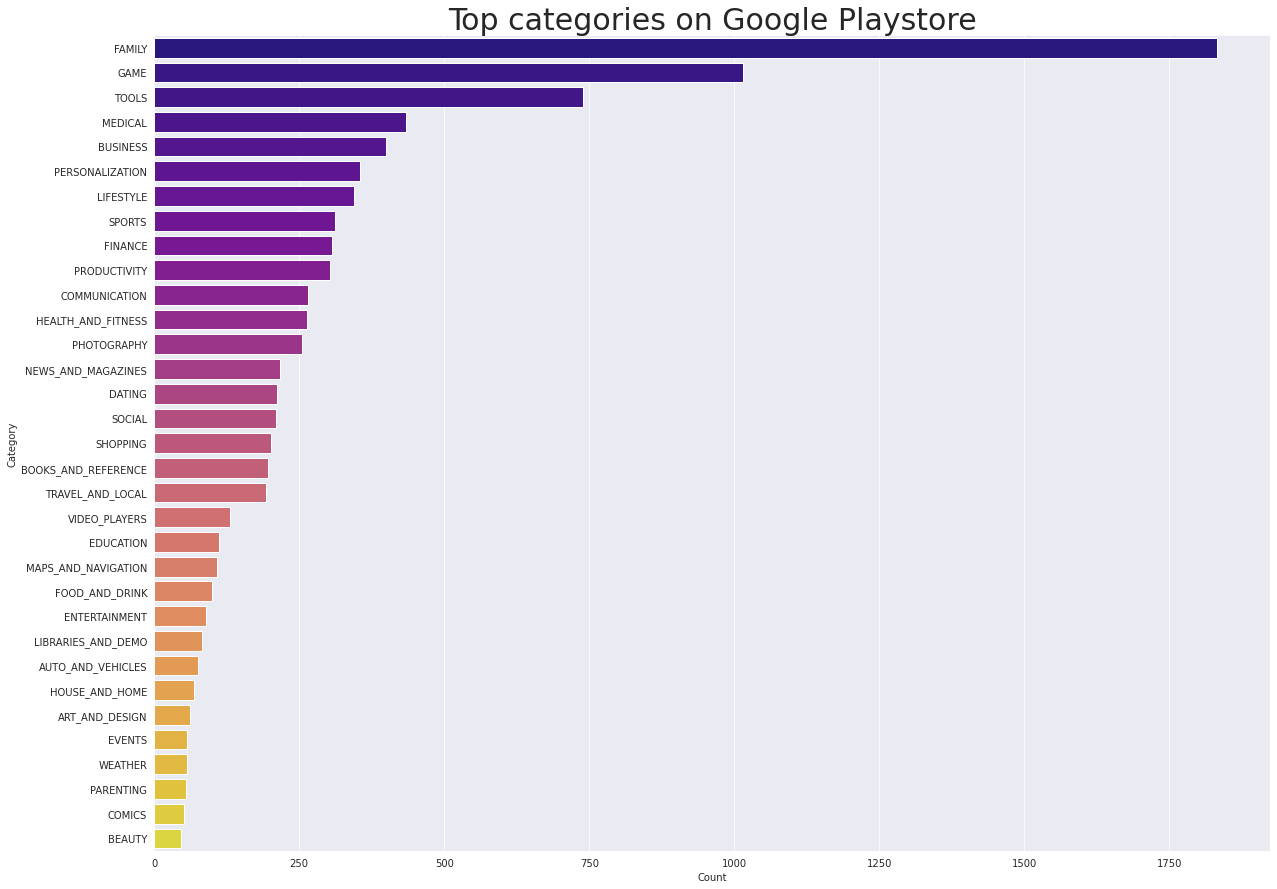

In [54]:
plt.figure(figsize=(20,15))
plt.xlabel("Count")
plt.ylabel("Category")

graph = sns.barplot(x = xsis, y = ysis, palette= "plasma")
graph.set_title("Top categories on Google Playstore", fontsize = 30);

#Conclusion

So there are all total 33 categories in the dataset From the above output we can come to a conclusion that in playstore most of the apps are under Family & Game category and least are of Beauty & Comics Category.

In [55]:
googlestore_df.head(30)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19000000.0,10000,Free,0.0,Everyone,Art & Design
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14000000.0,500000,Free,0.0,Everyone,Art & Design;Pretend Play
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8700000.0,5000000,Free,0.0,Everyone,Art & Design
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25000000.0,50000000,Free,0.0,Teen,Art & Design
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2800000.0,100000,Free,0.0,Everyone,Art & Design;Creativity
5,Paper flowers instructions,ART_AND_DESIGN,4.4,167,5600000.0,50000,Free,0.0,Everyone,Art & Design
6,Smoke Effect Photo Maker - Smoke Editor,ART_AND_DESIGN,3.8,178,19000000.0,50000,Free,0.0,Everyone,Art & Design
7,Infinite Painter,ART_AND_DESIGN,4.1,36815,29000000.0,1000000,Free,0.0,Everyone,Art & Design
8,Garden Coloring Book,ART_AND_DESIGN,4.4,13791,33000000.0,1000000,Free,0.0,Everyone,Art & Design
9,Kids Paint Free - Drawing Fun,ART_AND_DESIGN,4.7,121,3100000.0,10000,Free,0.0,Everyone,Art & Design;Creativity


# **Now lets check which category of Apps from the Content Rating column are found more on playstore**

In [56]:
x2 = googlestore_df['Content Rating'].value_counts().index
y2 = googlestore_df['Content Rating'].value_counts()

x2sis = []
y2sis = []

for i in range (len(x2)):
  x2sis.append(x2[i])
  y2sis.append(y2[i])



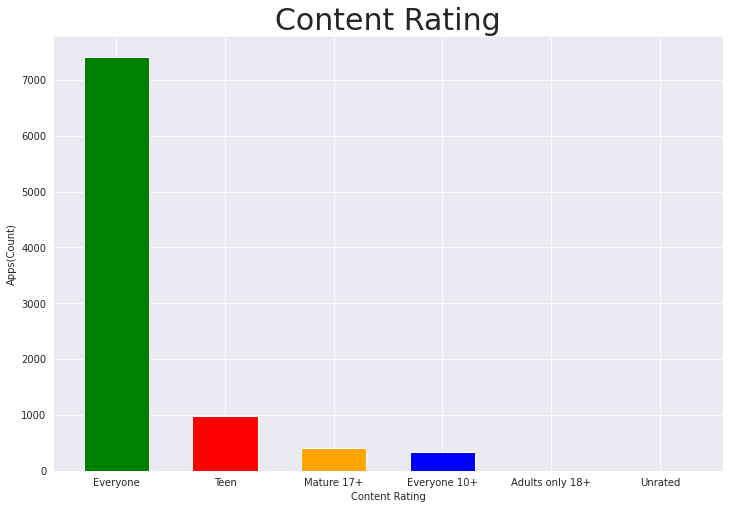

In [57]:
plt.figure(figsize=(12,8))
plt.bar(x2sis,y2sis,width=0.6,color=['green','red','orange','blue','cyan'],alpha=1);
plt.title('Content Rating',size = 30);
plt.ylabel('Apps(Count)');
plt.xlabel('Content Rating');

# **From the above bar plot we can conclude that Everyone category has the highest number of apps.**

# Lets check the distribution of the ratings

In [58]:
googlestore_df['Rating'].describe()

count    9145.000000
mean        4.208868
std         0.507267
min         1.000000
25%         4.100000
50%         4.400000
75%         4.500000
max         5.000000
Name: Rating, dtype: float64

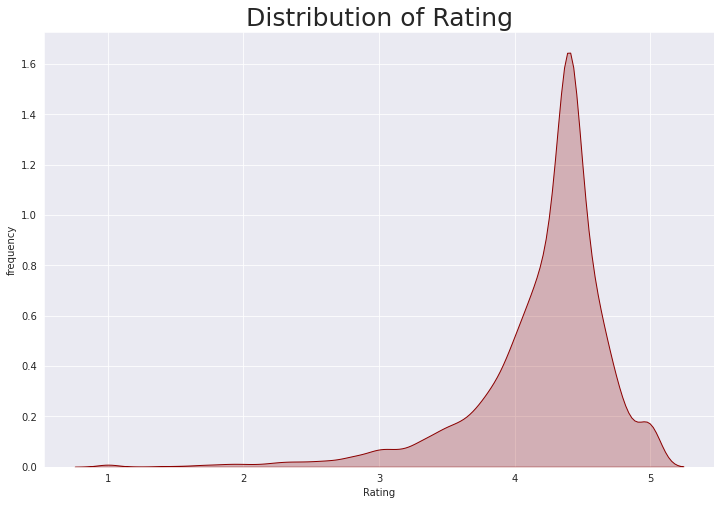

In [59]:
plt.figure(figsize = (12,8))
plt.xlabel('Rating')
plt.ylabel('frequency')
graph = sns.kdeplot(googlestore_df.Rating, color="DarkRed",shade = True)
plt.title('Distribution of Rating',size = 25);

# **Note: From the above graph we can come to a conclusion that most of the apps in google playstore are rated in between 3.7 to 4.8**



# **Let's plot a pie chart to view what portion of the apps in playstore are paid and free**


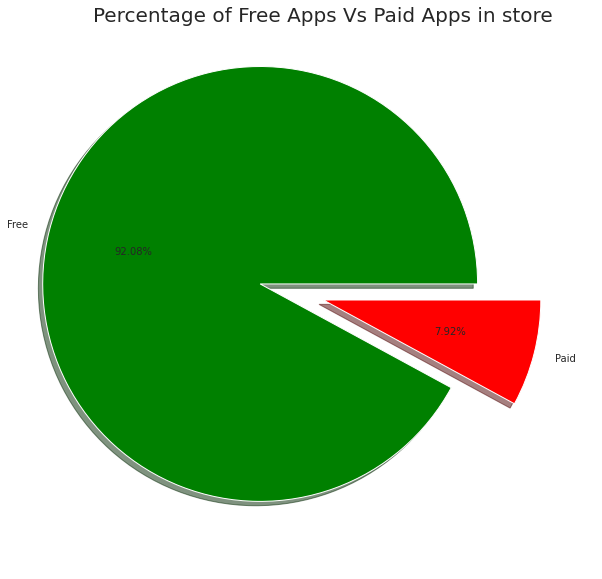

In [60]:
plt.figure(figsize = (12,10))
labels = googlestore_df['Type'].value_counts(sort = True).index
sizes = googlestore_df['Type'].value_counts(sort = True)
colors = ["Green","Red"]
explode = (0.3,0)
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%2.2f%%', shadow=True, startangle=0)
plt.title('Percentage of Free Apps Vs Paid Apps in store',size = 20)
plt.show()

#Note: From the above graph we can see that approx (92%) of the apps in google play store are free and 8%(Approx.) are paid.

# **Now lets us just check which category of app install in large numbers**

In [61]:
highest_Installs_df = googlestore_df.groupby('Category')[['Installs']].sum().sort_values(by='Installs', ascending=False)

In [62]:
highest_Installs_df.head()

,Installs
Category,
GAME,29874564253
FAMILY,6798793425
COMMUNICATION,4941943051
NEWS_AND_MAGAZINES,4252005650
TOOLS,3527094815


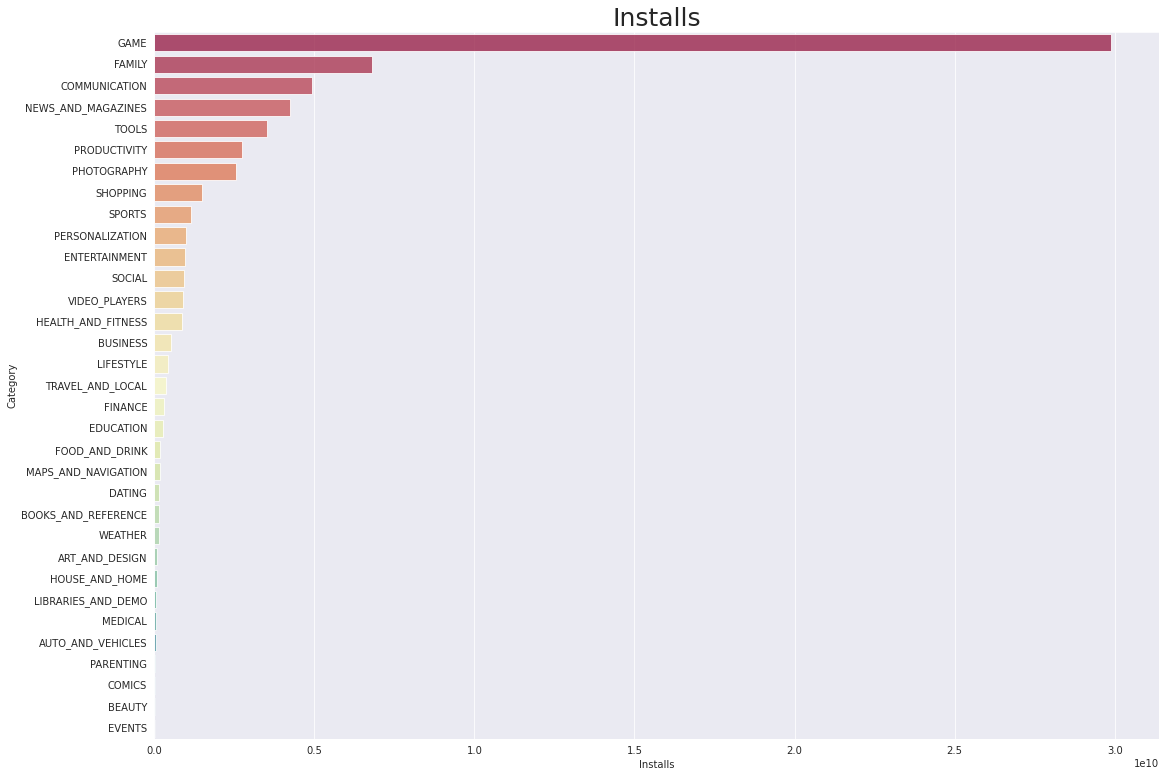

In [63]:
xsis = []
ysis = []

for i in range(len(highest_Installs_df)):
    xsis.append(highest_Installs_df.Installs[i])
    ysis.append(highest_Installs_df.index[i])

plt.figure(figsize=(18,13))

plt.xlabel("Installs")
plt.ylabel("Category")
graph = sns.barplot(x = xsis, y = ysis, alpha =.8, palette= "Spectral")
graph.set_title("Installs", fontsize = 25);

#**Note: From the above visualization, it can be interpreted that the top categories with highest installs are Game, Family, Communication, News & Magazines, & Tools.**

# Lets just find out 
What are the Top 10 installed apps in any category?

In [64]:
def findtop10incategory(str):
    str = str.upper()
    top10 = googlestore_df[googlestore_df['Category'] == str]
    top10apps = top10.sort_values(by='Installs', ascending=False).head(10)
    plt.figure(figsize=(15,12))
    plt.title('Top 10 Installed Apps',size = 20);    
    graph = sns.barplot(x = top10apps.App, y = top10apps.Installs)
    graph.set_xticklabels(graph.get_xticklabels(),Rotation = 45, horizontalalignment='right');

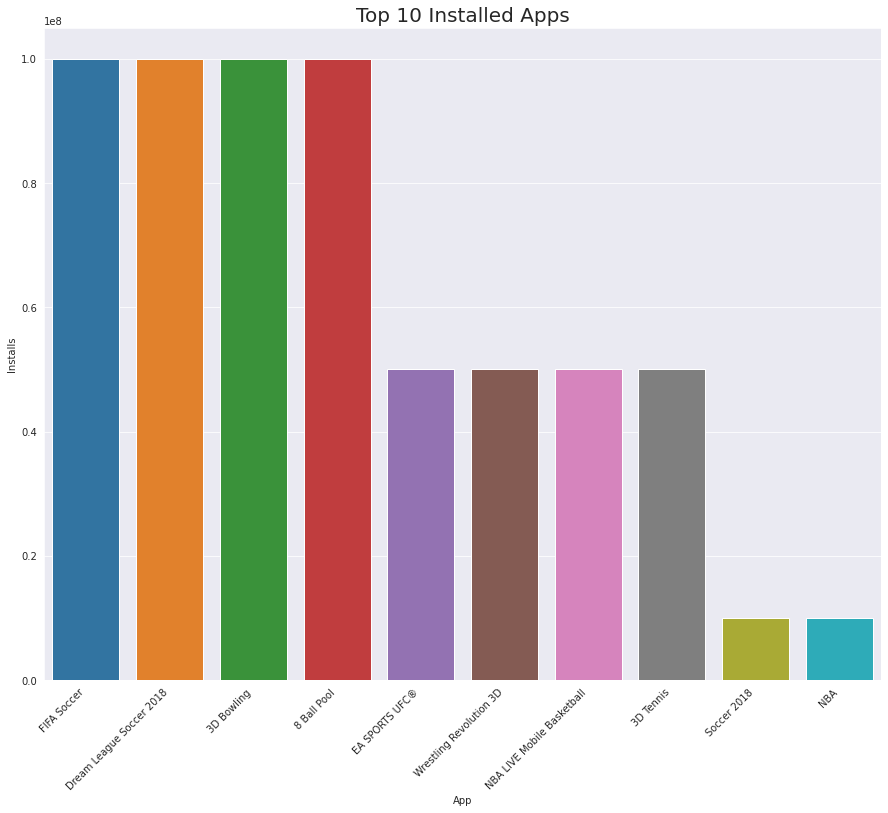

In [65]:
findtop10incategory('Sports')

#**Which are the Apps with highest number of reviews**

In [66]:
Highest_install_apps = googlestore_df.sort_values(by ='Reviews',ascending = False).head(10)

In [67]:
Highest_install_apps

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres
1879,Clash of Clans,GAME,4.6,44893888,98000000.0,100000000,Free,0.0,Everyone 10+,Strategy
1704,Clash of Clans,GAME,4.6,44891723,98000000.0,100000000,Free,0.0,Everyone 10+,Strategy
1670,Clash of Clans,GAME,4.6,44891723,98000000.0,100000000,Free,0.0,Everyone 10+,Strategy
3986,Clash of Clans,FAMILY,4.6,44881447,98000000.0,100000000,Free,0.0,Everyone 10+,Strategy
1872,Subway Surfers,GAME,4.5,27725352,76000000.0,1000000000,Free,0.0,Everyone 10+,Arcade
1917,Subway Surfers,GAME,4.5,27725352,76000000.0,1000000000,Free,0.0,Everyone 10+,Arcade
1750,Subway Surfers,GAME,4.5,27724094,76000000.0,1000000000,Free,0.0,Everyone 10+,Arcade
1700,Subway Surfers,GAME,4.5,27723193,76000000.0,1000000000,Free,0.0,Everyone 10+,Arcade
1654,Subway Surfers,GAME,4.5,27722264,76000000.0,1000000000,Free,0.0,Everyone 10+,Arcade
3896,Subway Surfers,GAME,4.5,27711703,76000000.0,1000000000,Free,0.0,Everyone 10+,Arcade


#**What are the count of Apps in different genres?**

In [68]:
topAppsinGenres = googlestore_df['Genres'].value_counts().head(50)

In [69]:

x3sis = []
y3sis = []

for i in range(len(topAppsinGenres)):
    x3sis.append(topAppsinGenres.index[i])
    y3sis.append(topAppsinGenres[i])

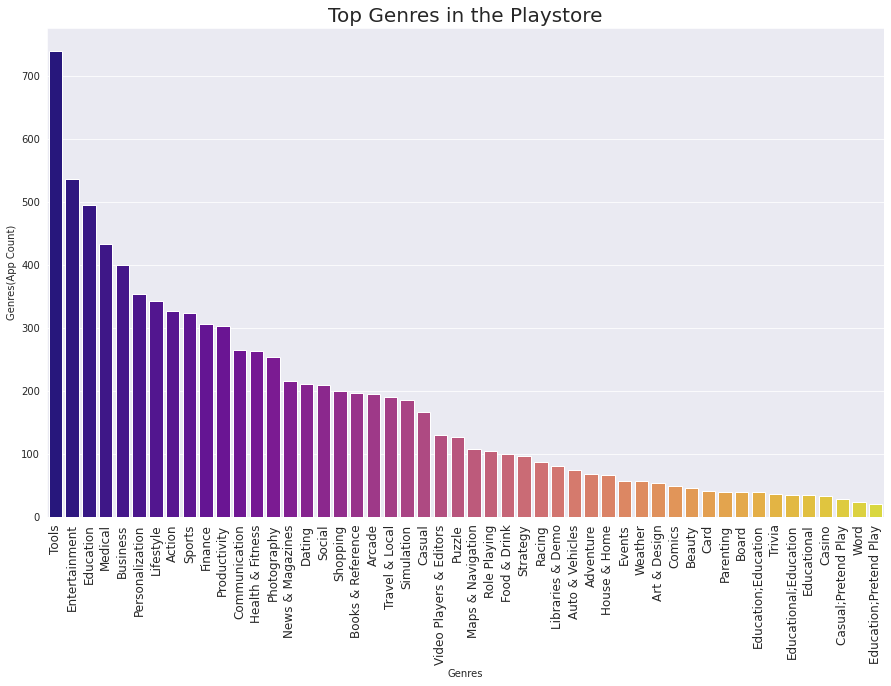

In [70]:
plt.figure(figsize=(15,9))
plt.ylabel('Genres(App Count)')
plt.xlabel('Genres')
graph = sns.barplot(x=x3sis,y=y3sis,palette="plasma")
graph.set_xticklabels(graph.get_xticklabels(), rotation=90, fontsize=12)
graph.set_title("Top Genres in the Playstore", fontsize = 20);